In [2]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

from functions import *
from data_cleaning import DataCleaning

pd.set_option('display.max_columns', None)

In [3]:
from db_connection import DatabaseConnector

db_connector = DatabaseConnector('horse')

db_connector.connect()

query = "SELECT * FROM reduced_horse_data;"

df = db_connector.fetch_data(query)

db_connector.disconnect()

df.head()

Connected to the database
Disconnected from the database


,Race Time,Course,Course Direction,Course Characteristics,Prize,Distance (y),Race Type,Runners,New Class No.,Min Age,Max Age,Handicap Limit,Time (secs),Official Going,Classifications,Total SP %,Draw,Draw IV,Position,Horse,Jockey Claim,Age,Weight (pounds),Penalty,Weight Rank,DSLR,Equip,Sex Abbrev,Form String,Pace String,SP Odds Decimal,"Won (1=Won, 0=Lost)","Place (1=Placed, 0=UnPlaced)",PRC Average,PRC Last Run,PRC 2nd Last Run,PRC 3rd Last Run,Pace Abbrev,Pace Rating,Pace Rating Rank,OR,OR Rank,PFR,PFR Rank,Main,Main Rank,Main Stats,Main+Stats Rank,Stats,Stats Rank,Trn Stats,Trainer Stats Rank,Jky Stats,Jockey Stats Rank,TrnJky Stats,Trainer/Jky Stats Rank,Hrs Stats,Horse Stats Rank,Proform Speed Rating,HA Career Speed Rating,HA Career Speed Rating Rank,HA Last 1 Year Speed Rating,HA Last 1 Year Speed Rating Rank,MR Career Speed Rating,MR Career Speed Rating Rank,MR Last 1 Year Speed Rating,MR Last 1 Year Speed Rating Rank,MR Last 3 Runs Speed Rating,MR Last 3 Runs Speed Rating Rank,LTO Speed Rating,LTO Speed Rating Rank,2nd LTO Speed Rating,2nd LTO Speed Rating Rank,3rd LTO Speed Rating,3rd LTO Speed Rating Rank,4th LTOt Speed Rating,4th LTO Speed Rating Rank,Evening Price,Breakfast Price,Morning Price,dyHA,dyLTO,dyAVG,dyAVG(x),dyMR,dyMR(x),dy2HA,VDW,Runs Before,Won Before,WON SR Before,Won P/L Before,Plc Before,Plc SR Before,Class LTO (Same Code),Distance In Yards LTO (Same Code),Pounds LTO (Same Code),Official Rating LTO (Same Code),Position LTO (Same Code),Course LTO (Same Code),Distance To Winner LTO (Same Code),SP Odds LTO (Decimcal) (Same Code),DSLR(F),DSLR(J),FLAT TURF Runs Before,FLAT AW Runs Before,CHASE Runs Before,HURDLE Runs Before,NHF Runs Before,ALL FLAT Runs Before,ALL JUMPS Runs Before,FLAT TURF Wins Before,FLAT AW Wins Before,CHASE Wins Before,HURDLE Wins Before,NHF Wins Before,ALL FLAT Wins Before,ALL JUMPS Wins Before,New Class LTO,Distance In Yards LTO,Value LTO,Pounds LTO,Official Rating LTO,Position LTO,Distance To Winner LTO,SP Odds LTO (Numerical),SP Odds LTO (Decimcal),Speed Rating LTO
0,01/10/2020 12:20:00,Salisbury,RH,Stiff / Galloping,5111,1760,Turf,12,4,2,2,,106.93,Good To Soft,Nov,117.1,2,0.63,2,Aleas,0,2,131,0,1,,,g,,,13,0,1,0,0,0,0,P,0,3,0,1,3,8,264,10,604,3,340,1,89,2,72,4,79,1,100,1,61,0,8,0,8,0,8,0,8,0,8,0,8,0,2,0,1,0,1,10,10,11,,,,,,,,,0,0,,,0,,,0,,,,,,,,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,0,,,,,,,,
1,01/10/2020 12:20:00,Salisbury,RH,Stiff / Galloping,5111,1760,Turf,12,4,2,2,,106.93,Good To Soft,Nov,117.1,9,0.98,1,Belloccio,0,2,131,0,1,,,c,,,12,1,0,0,0,0,0,H,0,3,0,1,3,8,264,10,560,7,296,4,67,8,81,3,48,12,100,1,61,0,8,0,8,0,8,0,8,0,8,0,8,0,2,0,1,0,1,13,13,10,,,,,,,,,0,0,,,0,,,0,,,,,,,,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,0,,,,,,,,
2,01/10/2020 12:20:00,Salisbury,RH,Stiff / Galloping,5111,1760,Turf,12,4,2,2,,106.93,Good To Soft,Nov,117.1,12,0.70,7,Colden's Passion,0,2,131,0,1,28,,c,4,H,17,0,0,73,73,0,0,P,0,3,0,1,11,5,315,4,514,10,199,11,39,12,65,6,61,8,34,9,51,53,4,53,4,53,4,53,4,53,4,53,4,0,2,0,1,0,1,11,11,11,53,53,53,53,53,53,,,1,0,0,-1,0,0,D,1760,131,0,4,Salisbury,6.19999980926514,17,28,,1,0,0,0,0,1,0,0,0,0,0,0,0,0,4,1760,4464,131,0,4,6.19999980926514,16,17,53
3,01/10/2020 12:20:00,Salisbury,RH,Stiff / Galloping,5111,1760,Turf,12,4,2,2,,106.93,Good To Soft,Nov,117.1,8,0.68,10,Dancing Master,0,2,131,0,1,24,,c,0,H,126,0,0,33,33,0,0,H,0,3,0,1,3,8,280,8,493,11,213,8,74,5,44,11,59,9,36,7,41,23,6,23,6,23,6,23,6,23,6,23,6,0,2,0,1,0,1,67,67,67,23,23,23,23,23,23,,,1,0,0,-1,0,0,E,1332,131,0,11,Windsor,30.5,34,24,,1,0,0,0,0,1,0,0,0,0,0,0,0,0,5,1332,4075,131,0,11,30.5,33,34,23
4,01/10/2020 12:20:00,Salisbury,RH,Stiff / Galloping,5111,1760,Turf,12,4,2,2,,106.93,Good To Soft,Nov,117.1,10,1.33,12,Gyenyame,0,2,131,0,1,,,c,,,21,0,0,0,0,0,0,H,0,3,0,1,3,8,264,10,593,4,329,3,82,3,69,5,78,3,100,1,37,0,8,0,8,0,8,0,8,0,8,0,8,0,2,0,1,0,1,21,21,19,,,,,,,,,0,0,,,0,,,0,,,,,,,,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,0,,,,,,,,


In [4]:
# count of unique races
unique_race_count = df['Race Time'].nunique()

print(f'Count of unique races is {unique_race_count}')

Count of unique races is 5743


In [5]:
# unique race courses in the data set
courses = df['Course'].unique()

courses

array(['Salisbury', 'Fairyhouse', 'Ascot', 'Tipperary', 'Newmarket',
       'Redcar', 'Killarney', 'Pontefract', 'Catterick', 'Leicester',
       'Nottingham', 'Navan', 'Ayr', 'Thurles', 'York', 'Limerick',
       'Curragh', 'Goodwood', 'Musselburgh', 'Yarmouth', 'Windsor',
       'Cork', 'Bath', 'Haydock', 'Leopardstown', 'Naas', 'Gowran Park',
       'Newbury', 'Doncaster', 'Galway', 'Beverley', 'Ripon', 'Thirsk',
       'Brighton', 'Epsom', 'Sandown', 'Wetherby', 'Chepstow', 'Sligo',
       'Hamilton', 'Chester', 'Lingfield', 'Roscommon', 'Carlisle',
       'Down Royal', 'Listowel', 'Ballinrobe', 'Bellewstown', 'Ffos Las',
       'Clonmel', 'Punchestown', 'Tramore'], dtype=object)

In [6]:
# unique race course characteristics in the data set
characteristics = df['Course Characteristics'].unique()

characteristics

array(['Stiff / Galloping', 'Easy', 'Galloping', 'Undulating',
       'Sharp / Undulating', 'Stiff / Undulating', 'Sharp', 'Stiff',
       'Galloping / Undulating'], dtype=object)

In [7]:
handicap = df['Handicap Limit'].unique()
handicap = sorted(handicap)

handicap

['', '100', '105', '110', '55', '60', '65', '70', '75', '80', '85', '90', '95']

In [8]:
type = df['Race Type'].unique()
type = sorted(type)

type

['Turf']

In [9]:
# unique race classifications in the data set
distance = df['Classifications'].unique()
distance = sorted(distance)

distance

['',
 'Auc',
 'Auc-Med',
 'Cla',
 'Clm',
 'Clm-App',
 'Con',
 'Con-Auc',
 'Con-Auc-Fil-Med',
 'Con-Auc-Med',
 'Con-EBF',
 'Con-Fil',
 'Con-Fil-Juv-EBF',
 'Con-Med',
 'EBF-Gp2',
 'EBF-Lis',
 'Fil-EBF-Gp3',
 'Fil-Gp1',
 'Fil-Gp2',
 'Fil-Gp3',
 'Fil-Lis',
 'Gp1',
 'Gp2',
 'Gp3',
 'Hcap',
 'Hcap-App',
 'Hcap-Fil',
 'Hcap-Fil-EBF',
 'Hcap-Lis',
 'Hcap-Mdn',
 'Hcap-Nur',
 'Hcap-Nur-Auc',
 'Hcap-Nur-Fil',
 'Hcap-Sell',
 'Hcap-Sell-App',
 'Juv-Gp2',
 'Lis',
 'Mdn',
 'Mdn-Ama',
 'Mdn-Auc',
 'Mdn-Auc-EBF',
 'Mdn-Auc-Fil',
 'Mdn-Auc-Fil-Med',
 'Mdn-Auc-Med',
 'Mdn-Clm',
 'Mdn-EBF',
 'Mdn-Fil',
 'Mdn-Fil-EBF',
 'Mdn-Fil-Med',
 'Mdn-Med',
 'Mdn-Med-EBF',
 'Nov',
 'Nov-Auc',
 'Nov-Auc-Fil-Med',
 'Nov-Auc-Med',
 'Nov-EBF',
 'Nov-Fil',
 'RSk',
 'Sell',
 'Sell-Cla',
 'Sell-Shw']

In [10]:
bins = [800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600,
        2800, 3000, 3200, 3400, 3600, 3800, 4000]

df['distance_bucket'] = pd.cut(df['Distance (y)'], bins = bins,
                               labels=['800-1000', '1000-1200', '1200-1400', '1400-1600', '1600-1800', '1800-2000',
                                       '2000-2200', '2200-2400', '2400-2600', '2600-2800', '2800-3000',
                                       '3000-3200', '3200-3400', '3400-3600', '3600-3800', '3800-4000'])

In [11]:
df['evening_morning_price'] = (df['Morning Price'] / df['Evening Price'])

df['breakfast_morning_price'] = (df['Morning Price'] / df['Breakfast Price'])

In [12]:
df['weight'] = df['Weight (pounds)'] - df['Jockey Claim']

In [13]:
df

,Race Time,Course,Course Direction,Course Characteristics,Prize,Distance (y),Race Type,Runners,New Class No.,Min Age,Max Age,Handicap Limit,Time (secs),Official Going,Classifications,Total SP %,Draw,Draw IV,Position,Horse,Jockey Claim,Age,Weight (pounds),Penalty,Weight Rank,DSLR,Equip,Sex Abbrev,Form String,Pace String,SP Odds Decimal,"Won (1=Won, 0=Lost)","Place (1=Placed, 0=UnPlaced)",PRC Average,PRC Last Run,PRC 2nd Last Run,PRC 3rd Last Run,Pace Abbrev,Pace Rating,Pace Rating Rank,OR,OR Rank,PFR,PFR Rank,Main,Main Rank,Main Stats,Main+Stats Rank,Stats,Stats Rank,Trn Stats,Trainer Stats Rank,Jky Stats,Jockey Stats Rank,TrnJky Stats,Trainer/Jky Stats Rank,Hrs Stats,Horse Stats Rank,Proform Speed Rating,HA Career Speed Rating,HA Career Speed Rating Rank,HA Last 1 Year Speed Rating,HA Last 1 Year Speed Rating Rank,MR Career Speed Rating,MR Career Speed Rating Rank,MR Last 1 Year Speed Rating,MR Last 1 Year Speed Rating Rank,MR Last 3 Runs Speed Rating,MR Last 3 Runs Speed Rating Rank,LTO Speed Rating,LTO Speed Rating Rank,2nd LTO Speed Rating,2nd LTO Speed Rating Rank,3rd LTO Speed Rating,3rd LTO Speed Rating Rank,4th LTOt Speed Rating,4th LTO Speed Rating Rank,Evening Price,Breakfast Price,Morning Price,dyHA,dyLTO,dyAVG,dyAVG(x),dyMR,dyMR(x),dy2HA,VDW,Runs Before,Won Before,WON SR Before,Won P/L Before,Plc Before,Plc SR Before,Class LTO (Same Code),Distance In Yards LTO (Same Code),Pounds LTO (Same Code),Official Rating LTO (Same Code),Position LTO (Same Code),Course LTO (Same Code),Distance To Winner LTO (Same Code),SP Odds LTO (Decimcal) (Same Code),DSLR(F),DSLR(J),FLAT TURF Runs Before,FLAT AW Runs Before,CHASE Runs Before,HURDLE Runs Before,NHF Runs Before,ALL FLAT Runs Before,ALL JUMPS Runs Before,FLAT TURF Wins Before,FLAT AW Wins Before,CHASE Wins Before,HURDLE Wins Before,NHF Wins Before,ALL FLAT Wins Before,ALL JUMPS Wins Before,New Class LTO,Distance In Yards LTO,Value LTO,Pounds LTO,Official Rating LTO,Position LTO,Distance To Winner LTO,SP Odds LTO (Numerical),SP Odds LTO (Decimcal),Speed Rating LTO,distance_bucket,evening_morning_price,breakfast_morning_price,weight
0,01/10/2020 12:20:00,Salisbury,RH,Stiff / Galloping,5111,1760,Turf,12,4,2,2,,106.930000,Good To Soft,Nov,117.1,2,0.63,2,Aleas,0,2,131,0,1,,,g,,,13,0,1,0,0,0,0,P,0,3,0,1,3,8,264,10,604,3,340,1,89,2,72,4,79,1,100,1,61,0,8,0,8,0,8,0,8,0,8,0,8,0,2,0,1,0,1,10,10,11,,,,,,,,,0,0,,,0,,,0,,,,,,,,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,0,,,,,,,,,1600-1800,1.100000,1.100000,131
1,01/10/2020 12:20:00,Salisbury,RH,Stiff / Galloping,5111,1760,Turf,12,4,2,2,,106.930000,Good To Soft,Nov,117.1,9,0.98,1,Belloccio,0,2,131,0,1,,,c,,,12,1,0,0,0,0,0,H,0,3,0,1,3,8,264,10,560,7,296,4,67,8,81,3,48,12,100,1,61,0,8,0,8,0,8,0,8,0,8,0,8,0,2,0,1,0,1,13,13,10,,,,,,,,,0,0,,,0,,,0,,,,,,,,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,,0,,,,,,,,,1600-1800,0.769231,0.769231,131
2,01/10/2020 12:20:00,Salisbury,RH,Stiff / Galloping,5111,1760,Turf,12,4,2,2,,106.930000,Good To Soft,Nov,117.1,12,0.70,7,Colden's Passion,0,2,131,0,1,28,,c,4,H,17,0,0,73,73,0,0,P,0,3,0,1,11,5,315,4,514,10,199,11,39,12,65,6,61,8,34,9,51,53,4,53,4,53,4,53,4,53,4,53,4,0,2,0,1,0,1,11,11,11,53,53,53,53,53,53,,,1,0,0,-1,0,0,D,1760,131,0,4,Salisbury,6.19999980926514,17,28,,1,0,0,0,0,1,0,0,0,0,0,0,0,0,4,1760,4464,131,0,4,6.19999980926514,16,17,53,1600-1800,1.000000,1.000000,131
3,01/10/2020 12:20:00,Salisbury,RH,Stiff / Galloping,5111,1760,Turf,12,4,2,2,,106.930000,Good To Soft,Nov,117.1,8,0.68,10,Dancing Master,0,2,131,0,1,24,,c,0,H,126,0,0,33,33,0,0,H,0,3,0,1,3,8,280,8,493,11,213,8,74,5,44,11,59,9,36,7,41,23,6,23,6,23,6,23,6,23,6,23,6,0,2,0,1,0,1,67,67,67,23,23,23,23,23,23,,,1,0,0,-1,0,0,E,1332,131,0,11,Windsor,30.5,34,24,,1,0,0,0,0,1,0,0,0,0,0,0,0,0,5,1332,4075,131,0,11,30.5,33,34,23,1600-1800,1.000000,1.000000,131
4,01/10/2020 12:20:00,Salisbury,RH,Stiff / Galloping,5111,1760,Turf,12,4,2,2,,106.930000,Good To Soft,Nov,117.1,10,1.33,12,Gyenyame,0,2,131,0,1,,,c,,,21,0,0,0,0,0,0,H,0,3,0,1,3,8,264,10,593,4,329,3,82,3,69,5,78,3,100,1,37,0,8,0,8,0

# CREATE A DF TO USE FOR MODELLING

In [14]:
data = df[['Race Time', 'Course', 'Horse', 'Distance (y)', 'SP Odds Decimal', 'Won (1=Won, 0=Lost)', 'Place (1=Placed, 0=UnPlaced)', 
        'Pace Rating Rank', 'Trainer/Jky Stats Rank', 'Proform Speed Rating', 'LTO Speed Rating Rank', 'MR Career Speed Rating Rank',
        'WON SR Before', 'Won P/L Before', 'Plc SR Before', 'Official Rating LTO', 'Position LTO', 'distance_bucket', 'evening_morning_price',
        'breakfast_morning_price', 'weight']]

In [15]:
data[['WON SR Before', 'Won P/L Before', 'Plc SR Before', 'Official Rating LTO', 'Position LTO']] \
    = data[['WON SR Before', 'Won P/L Before', 'Plc SR Before', 'Official Rating LTO', 'Position LTO']].map(pd.to_numeric)


/var/folders/nv/lzp9ffbj6cs24kjrpcj0q1ym0000gn/T/ipykernel_98758/1411985569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['WON SR Before', 'Won P/L Before', 'Plc SR Before', 'Official Rating LTO', 'Position LTO']] \


In [16]:
data.dtypes

Race Time                         object
Course                            object
Horse                             object
Distance (y)                       int64
SP Odds Decimal                    int64
Won (1=Won, 0=Lost)                int64
Place (1=Placed, 0=UnPlaced)       int64
Pace Rating Rank                   int64
Trainer/Jky Stats Rank             int64
Proform Speed Rating               int64
LTO Speed Rating Rank              int64
MR Career Speed Rating Rank        int64
WON SR Before                    float64
Won P/L Before                   float64
Plc SR Before                    float64
Official Rating LTO              float64
Position LTO                     float64
distance_bucket                 category
evening_morning_price            float64
breakfast_morning_price          float64
weight                             int64
dtype: object

In [17]:
def assign_odds_order(group):
    group['sp_odds_rank'] = group['SP Odds Decimal'].rank(method = 'min').astype(int)
    return group

In [18]:
# group by Race Time and Course, and apply the transformation
data1 = data.groupby(['Race Time', 'Course']).apply(assign_odds_order)
data1 = data1.reset_index(drop=True)

/var/folders/nv/lzp9ffbj6cs24kjrpcj0q1ym0000gn/T/ipykernel_98758/3335211718.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data1 = data.groupby(['Race Time', 'Course']).apply(assign_odds_order)


In [19]:
data1[['WON SR Before', 'Won P/L Before', 'Plc SR Before', 'Official Rating LTO', 'Position LTO']] \
    = data1[['WON SR Before', 'Won P/L Before', 'Plc SR Before', 'Official Rating LTO', 'Position LTO']].fillna(0)

In [20]:
data1.head()

,Race Time,Course,Horse,Distance (y),SP Odds Decimal,"Won (1=Won, 0=Lost)","Place (1=Placed, 0=UnPlaced)",Pace Rating Rank,Trainer/Jky Stats Rank,Proform Speed Rating,LTO Speed Rating Rank,MR Career Speed Rating Rank,WON SR Before,Won P/L Before,Plc SR Before,Official Rating LTO,Position LTO,distance_bucket,evening_morning_price,breakfast_morning_price,weight,sp_odds_rank
0,01/04/2022 13:00:00,Leicester,Camacho Star,1100,4,0,0,2,3,23,3,3,0.0,0.0,0.0,0.0,0.0,1000-1200,0.833333,0.909091,131,2
1,01/04/2022 13:00:00,Leicester,Cheeky Maxi,1100,3,0,0,2,7,24,3,3,0.0,0.0,0.0,0.0,0.0,1000-1200,0.750000,0.750000,131,1
2,01/04/2022 13:00:00,Leicester,Global Effort,1100,13,0,0,2,2,42,3,3,0.0,0.0,0.0,0.0,0.0,1000-1200,1.000000,1.000000,131,6
3,01/04/2022 13:00:00,Leicester,Jiffy Boy,1100,5,1,0,2,11,46,1,1,0.0,-1.0,100.0,0.0,3.0,1000-1200,1.500000,1.500000,131,3
4,01/04/2022 13:00:00,Leicester,Man Made Of Smoke,1100,67,0,0,2,6,35,3,3,0.0,0.0,0.0,0.0,0.0,1000-1200,1.313725,1.313725,121,9


In [21]:
data1.to_csv('../data/modelling_data.csv')

In [22]:
# Create the pivot table
pivot_df = data1.pivot_table(index='sp_odds_rank', columns='Won (1=Won, 0=Lost)', aggfunc='size', fill_value=0)

# Reset index if needed
pivot_df = pivot_df.reset_index()

# Rename the columns if needed
pivot_df.columns.name = None  # Remove the column name
pivot_df.rename(columns={0: 'Lost', 1: 'Won'}, inplace=True)

# Calculate the total count for each 'sp_odds_rank'
pivot_df['Total'] = pivot_df['Lost'] + pivot_df['Won']

# Calculate the proportion of wins for each 'sp_odds_rank'
pivot_df['Win Proportion'] = pivot_df['Won'] / pivot_df['Total']

# Display the resulting DataFrame
print(pivot_df)

    sp_odds_rank  Lost   Won  Total  Win Proportion
0              1  4793  2449   7242        0.338166
1              2  4532  1072   5604        0.191292
2              3  4761   660   5421        0.121749
3              4  4981   545   5526        0.098625
4              5  4914   390   5304        0.073529
5              6  4602   221   4823        0.045822
6              7  4081   166   4247        0.039086
7              8  3451   100   3551        0.028161
8              9  2716    56   2772        0.020202
9             10  2074    42   2116        0.019849
10            11  1541    22   1563        0.014075
11            12  1114    20   1134        0.017637
12            13   790     5    795        0.006289
13            14   468     2    470        0.004255
14            15   350     2    352        0.005682
15            16   206     1    207        0.004831
16            17   119     1    120        0.008333
17            18    70     0     70        0.000000
18          

In [23]:
# Filter the DataFrame to select only rows where 'sp_odds_rank' is 1
strategy_df = data1[data1['sp_odds_rank'] == 1]

# Calculate the total amount won (assuming you placed £1 on each winning horse)
total_amount_won = (strategy_df['Won (1=Won, 0=Lost)'] * strategy_df['SP Odds Decimal']).sum()

# Calculate the total amount spent on bets (assuming you placed £1 on each horse)
total_amount_spent = len(strategy_df)

# need to calculate the stake return for winning bets
winning_bets = len(strategy_df[strategy_df['Won (1=Won, 0=Lost)']==1])

# Calculate the profit/loss (including stake refund for winning bets)
profit_loss = total_amount_won - total_amount_spent

# Calculate the percentage of profit versus the total amount staked
profit_percentage = (profit_loss / total_amount_spent) * 100

# Display the profit/loss and profit percentage
print("Profit/Loss: £", profit_loss)
print(f"Total Number of Winning Bets: {winning_bets}")
print(f"Total Number of Bets Placed : {total_amount_spent}")
print("Profit Percentage: ", round(profit_percentage,2), "%")


Profit/Loss: £ -345
Total Number of Winning Bets: 2449
Total Number of Bets Placed : 7242
Profit Percentage:  -4.76 %


In [24]:
total_amount_spent

7242

# explore a strategy of laying every horse in a race for a stake of 1 pound

In [25]:
data1.head()

,Race Time,Course,Horse,Distance (y),SP Odds Decimal,"Won (1=Won, 0=Lost)","Place (1=Placed, 0=UnPlaced)",Pace Rating Rank,Trainer/Jky Stats Rank,Proform Speed Rating,LTO Speed Rating Rank,MR Career Speed Rating Rank,WON SR Before,Won P/L Before,Plc SR Before,Official Rating LTO,Position LTO,distance_bucket,evening_morning_price,breakfast_morning_price,weight,sp_odds_rank
0,01/04/2022 13:00:00,Leicester,Camacho Star,1100,4,0,0,2,3,23,3,3,0.0,0.0,0.0,0.0,0.0,1000-1200,0.833333,0.909091,131,2
1,01/04/2022 13:00:00,Leicester,Cheeky Maxi,1100,3,0,0,2,7,24,3,3,0.0,0.0,0.0,0.0,0.0,1000-1200,0.750000,0.750000,131,1
2,01/04/2022 13:00:00,Leicester,Global Effort,1100,13,0,0,2,2,42,3,3,0.0,0.0,0.0,0.0,0.0,1000-1200,1.000000,1.000000,131,6
3,01/04/2022 13:00:00,Leicester,Jiffy Boy,1100,5,1,0,2,11,46,1,1,0.0,-1.0,100.0,0.0,3.0,1000-1200,1.500000,1.500000,131,3
4,01/04/2022 13:00:00,Leicester,Man Made Of Smoke,1100,67,0,0,2,6,35,3,3,0.0,0.0,0.0,0.0,0.0,1000-1200,1.313725,1.313725,121,9


In [26]:
def lay_profit(df):
    lay_results = []

    for race_id, race_data in df.groupby('Race Time'):
        for _, row in race_data.iterrows():
            odds = row['SP Odds Decimal']
            won = row['Won (1=Won, 0=Lost)']
            stake = 1

            if won == 1:
                # horse wins, lose the lay bet, ODDS SHOULD BE THE LAY ODD'S
                liability = (odds - 1) * stake
                lay_results.append(-liability)

            else:
                # horse lost, you win the stake
                lay_results.append(stake)

    return lay_results


In [28]:
# Calculate lay results
data1['lay_profit_loss'] = lay_profit(data1)

# Calculate total profit/loss
total_profit_loss = data1['lay_profit_loss'].sum()
print("Total Profit/Loss from lay betting strategy:", total_profit_loss)

Total Profit/Loss from lay betting strategy: 11206


In [32]:
average_profit_loss_per_race = data1.groupby('Race Time')['lay_profit_loss'].sum().mean()
print("Average Profit/Loss per race:", average_profit_loss_per_race)

Average Profit/Loss per race: 1.9512449939056242


In [30]:
data1.head(100)

,Race Time,Course,Horse,Distance (y),SP Odds Decimal,"Won (1=Won, 0=Lost)","Place (1=Placed, 0=UnPlaced)",Pace Rating Rank,Trainer/Jky Stats Rank,Proform Speed Rating,LTO Speed Rating Rank,MR Career Speed Rating Rank,WON SR Before,Won P/L Before,Plc SR Before,Official Rating LTO,Position LTO,distance_bucket,evening_morning_price,breakfast_morning_price,weight,sp_odds_rank,lay_profit_loss
0,01/04/2022 13:00:00,Leicester,Camacho Star,1100,4,0,0,2,3,23,3,3,0.00,0.00,0.00,0.0,0.0,1000-1200,0.833333,0.909091,131,2,1
1,01/04/2022 13:00:00,Leicester,Cheeky Maxi,1100,3,0,0,2,7,24,3,3,0.00,0.00,0.00,0.0,0.0,1000-1200,0.750000,0.750000,131,1,1
2,01/04/2022 13:00:00,Leicester,Global Effort,1100,13,0,0,2,2,42,3,3,0.00,0.00,0.00,0.0,0.0,1000-1200,1.000000,1.000000,131,6,1
3,01/04/2022 13:00:00,Leicester,Jiffy Boy,1100,5,1,0,2,11,46,1,1,0.00,-1.00,100.00,0.0,3.0,1000-1200,1.500000,1.500000,131,3,-4
4,01/04/2022 13:00:00,Leicester,Man Made Of Smoke,1100,67,0,0,2,6,35,3,3,0.00,0.00,0.00,0.0,0.0,1000-1200,1.313725,1.313725,121,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,01/05/2021 16:20:00,Goodwood,Wholelotafun,2177,17,0,0,1,6,64,3,2,8.33,7.00,8.33,65.0,5.0,2000-2200,0.724138,0.913043,117,7,1
96,01/05/2021 16:20:00,Goodwood,Soyuz,2177,34,0,0,3,4,57,8,7,0.00,-4.00,0.00,67.0,5.0,2000-2200,0.896552,0.896552,127,10,1
97,01/05/2021 16:20:00,Goodwood,Thistleton,2177,51,0,0,13,13,56,9,8,0.00,-3.00,0.00,0.0,10.0,2000-2200,1.758621,1.243902,126,12,1
98,01/05/2021 16:20:00,Goodwood,Night Eagle,2177,21,0,0,3,12,63,6,9,0.00,-3.00,0.00,0.0,5.0,2000-2200,0.700000,0.777778,119,8,1


look at a function where we can vary the amount of horses being laid

In [54]:
def lay_profit_top_n(df, n):
    lay_results = []

    for race_id, race_data in df.groupby('Race Time'):
        # Sort the race data by sp_odds_rank and take the top n
        top_n_horses = race_data.sort_values('sp_odds_rank').head(n)

        for _, row in race_data.iterrows():
            if row['sp_odds_rank'] <= n:
                odds = row['SP Odds Decimal']
                won = row['Won (1=Won, 0=Lost)']
                stake = 1

                if won == 1:
                    # Horse wins, you lose the lay bet, liability should be (odds - 1) * stake
                    liability = (odds - 1) * stake
                    lay_results.append(-liability)
                else:
                    # Horse loses, you win the stake
                    lay_results.append(stake)
            else:
                lay_results.append(0)  # For horses not in the top n, no lay bet is placed

    return lay_results
                

In [55]:
# Calculate lay results
data1['lay_profit_loss'] = lay_profit_top_n(data1, 5)

# Calculate total profit/loss
total_profit_loss = data1['lay_profit_loss'].sum()
print("Total Profit/Loss from lay betting strategy:", total_profit_loss)

Total Profit/Loss from lay betting strategy: 3444


In [56]:
success_rate = sum(profit > 0 for profit in data1['lay_profit_loss']) / len(data1['lay_profit_loss'])
print(f"Success Rate: {success_rate}")

Success Rate: 0.4653793906462255


In [59]:
data1.head(19)

,Race Time,Course,Horse,Distance (y),SP Odds Decimal,"Won (1=Won, 0=Lost)","Place (1=Placed, 0=UnPlaced)",Pace Rating Rank,Trainer/Jky Stats Rank,Proform Speed Rating,LTO Speed Rating Rank,MR Career Speed Rating Rank,WON SR Before,Won P/L Before,Plc SR Before,Official Rating LTO,Position LTO,distance_bucket,evening_morning_price,breakfast_morning_price,weight,sp_odds_rank,lay_profit_loss
0,01/04/2022 13:00:00,Leicester,Camacho Star,1100,4,0,0,2,3,23,3,3,0.00,0.00,0.00,0.0,0.0,1000-1200,0.833333,0.909091,131,2,1
1,01/04/2022 13:00:00,Leicester,Cheeky Maxi,1100,3,0,0,2,7,24,3,3,0.00,0.00,0.00,0.0,0.0,1000-1200,0.750000,0.750000,131,1,1
2,01/04/2022 13:00:00,Leicester,Global Effort,1100,13,0,0,2,2,42,3,3,0.00,0.00,0.00,0.0,0.0,1000-1200,1.000000,1.000000,131,6,0
3,01/04/2022 13:00:00,Leicester,Jiffy Boy,1100,5,1,0,2,11,46,1,1,0.00,-1.00,100.00,0.0,3.0,1000-1200,1.500000,1.500000,131,3,-4
4,01/04/2022 13:00:00,Leicester,Man Made Of Smoke,1100,67,0,0,2,6,35,3,3,0.00,0.00,0.00,0.0,0.0,1000-1200,1.313725,1.313725,121,9,0
5,01/04/2022 13:00:00,Leicester,Mirabello Bay,1100,151,0,0,2,10,31,3,3,0.00,0.00,0.00,0.0,0.0,1000-1200,1.980392,1.980392,131,11,0
6,01/04/2022 13:00:00,Leicester,Rhodium,1100,126,0,0,2,9,22,3,3,0.00,0.00,0.00,0.0,0.0,1000-1200,1.980392,1.980392,131,10,0
7,01/04/2022 13:00:00,Leicester,Rousing Encore,1100,15,0,1,2,8,43,3,3,0.00,0.00,0.00,0.0,0.0,1000-1200,1.615385,1.615385,131,7,0
8,01/04/2022 13:00:00,Leicester,Strength 'n Honour,1100,12,0,0,2,5,40,3,3,0.00,0.00,0.00,0.0,0.0,1000-1200,1.900000,1.900000,131,5,1
9,01/04/2022 13:00:00,Leicester,Evolicatt,1100,9,0,1,1,1,44,2,2,0.00,-1.00,0.00,0.0,5.0,1000-1200,1.000000,1.000000,126,4,1


# look at a dutching calculator

In [35]:
def dutching_calculator(odds, total_return):
    inverses = [1.0 / odd for odd in odds]
    total_inverses = sum(inverses)

    stakes = [(total_return / total_inverses) * inverse for inverse in inverses]

    return stakes

In [49]:
def dutching_strategy(df, total_return = 10):
    results = []

    grouped = df.groupby('Race Time')

    for race_id, group in grouped:
        # filter the top 3 horses from sp_odds_rank
        top3 = group.nsmallest(4, 'sp_odds_rank')

        # if there's not exactly 3 horses skip
        if len(top3) != 4:
            continue

        odds = top3['SP Odds Decimal'].tolist()
        stakes = dutching_calculator(odds, total_return)

        # calculate profit / loss for each horse
        for i, (index, row) in enumerate(top3.iterrows()):
            stake = stakes[i]

            if row['Won (1=Won, 0=Lost)'] == 1:
                profit = stake * row['SP Odds Decimal'] - sum(stakes)

            else:
                profit = -stake

            results.append({'race_id': race_id, 'horse_id' : row['Horse'], 'stake' : stake, 'profit' : profit})

    return pd.DataFrame(results)

In [50]:
results_df = dutching_strategy(data1)
total_profit = results_df['profit'].sum()
success_rate = (results_df['profit'] > 0).mean()

print(f"Total Profit: {total_profit}")
print(f"Success Rate: {success_rate}")

Total Profit: -35954.832937136234
Success Rate: 0.1536932320197915


In [48]:
results_df.head(30)

,race_id,horse_id,stake,profit
0,01/04/2022 13:00:00,Cheeky Maxi,4.255319,-4.255319
1,01/04/2022 13:00:00,Camacho Star,3.191489,-3.191489
2,01/04/2022 13:00:00,Jiffy Boy,2.553191,2.765957
3,01/04/2022 14:45:00,Watermelon Sugar,7.974684,-2.025316
4,01/04/2022 14:45:00,Rhinoplasty,1.139241,-1.139241
5,01/04/2022 14:45:00,Profit And Loss,0.886076,-0.886076
6,01/04/2022 15:55:00,Nahanni,4.000000,2.000000
7,01/04/2022 15:55:00,Juan Bermudez,3.000000,-3.000000
8,01/04/2022 15:55:00,March Moon,3.000000,-3.000000
9,01/04/2023 13:50:00,Valadero,4.285714,-4.285714


# Use a random forest model to determine feature importance. From this we can start building a model.

In [24]:
data1.columns

Index(['Race Time', 'Course', 'Horse', 'Distance (y)', 'SP Odds Decimal',
       'Won (1=Won, 0=Lost)', 'Place (1=Placed, 0=UnPlaced)',
       'Pace Rating Rank', 'Trainer/Jky Stats Rank', 'Proform Speed Rating',
       'LTO Speed Rating Rank', 'MR Career Speed Rating Rank', 'WON SR Before',
       'Won P/L Before', 'Plc SR Before', 'Official Rating LTO',
       'Position LTO', 'distance_bucket', 'evening_morning_price',
       'breakfast_morning_price', 'weight', 'sp_odds_rank'],
      dtype='object')

In [25]:
normalized_df = DataCleaning.normalize_columns(data1, ['SP Odds Decimal','Pace Rating Rank',
       'Trainer/Jky Stats Rank', 'Proform Speed Rating',
       'LTO Speed Rating Rank', 'MR Career Speed Rating Rank', 'WON SR Before',
       'Won P/L Before', 'Plc SR Before', 'Official Rating LTO',
       'Position LTO', 'evening_morning_price',
       'breakfast_morning_price', 'weight', 'sp_odds_rank'])

normalized_df.head(5)

,Race Time,Course,Horse,Distance (y),SP Odds Decimal,"Won (1=Won, 0=Lost)","Place (1=Placed, 0=UnPlaced)",Pace Rating Rank,Trainer/Jky Stats Rank,Proform Speed Rating,LTO Speed Rating Rank,MR Career Speed Rating Rank,WON SR Before,Won P/L Before,Plc SR Before,Official Rating LTO,Position LTO,distance_bucket,evening_morning_price,breakfast_morning_price,weight,sp_odds_rank
0,01/04/2022 13:00:00,Leicester,Camacho Star,1100,0.006,0,0,0.037037,0.068966,0.264368,0.068966,0.068966,0.0,0.129663,0.0,0.0,0.000000,1000-1200,0.072046,0.130210,0.647059,0.034483
1,01/04/2022 13:00:00,Leicester,Cheeky Maxi,1100,0.004,0,0,0.037037,0.206897,0.275862,0.068966,0.068966,0.0,0.129663,0.0,0.0,0.000000,1000-1200,0.063279,0.103665,0.647059,0.000000
2,01/04/2022 13:00:00,Leicester,Global Effort,1100,0.024,0,0,0.037037,0.034483,0.482759,0.068966,0.068966,0.0,0.129663,0.0,0.0,0.000000,1000-1200,0.089580,0.145378,0.647059,0.172414
3,01/04/2022 13:00:00,Leicester,Jiffy Boy,1100,0.008,1,0,0.037037,0.344828,0.528736,0.000000,0.000000,0.0,0.126110,1.0,0.0,0.011811,1000-1200,0.142182,0.228806,0.647059,0.068966
4,01/04/2022 13:00:00,Leicester,Man Made Of Smoke,1100,0.132,0,0,0.037037,0.172414,0.402299,0.068966,0.068966,0.0,0.129663,0.0,0.0,0.000000,1000-1200,0.122585,0.197725,0.450980,0.275862


In [28]:
X = normalized_df.drop(['Race Time', 'Course', 'Horse', 'Distance (y)', 'Won (1=Won, 0=Lost)', 'Place (1=Placed, 0=UnPlaced)', 'distance_bucket'], axis = 1)
y = normalized_df[['Won (1=Won, 0=Lost)']]

/Users/andrewbarwise/miniforge3/envs/horse_trading/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


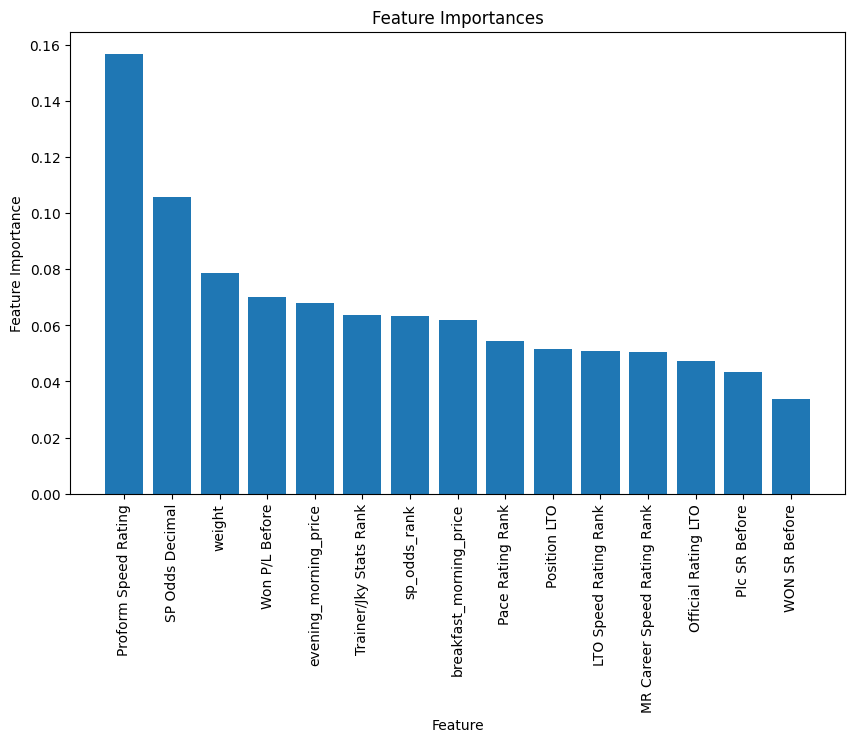

In [29]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Get feature importances
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()